In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For splitting and evaluating the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report


In [9]:
#Load the dataset
df =pd.read_csv("breast_cancer.csv")

In [21]:
# Check the shape of the data
print(df.shape)

(569, 33)


In [ ]:
# Show or previous soce few columns

In [31]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [35]:
#Understand the data
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [49]:
print(df["diagnosis"].value_counts())


diagnosis
B    357
M    212
Name: count, dtype: int64


In [53]:
#Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Dataset is clean

In [59]:
# Drop unneccessary columns
df.drop(["id", "Unnamed: 32"], axis =1, inplace = True)

In [63]:
# Map diagnosis to a new 'priority' label M = High, B = Low.
df["priority"] = df["diagnosis"].map({"M":"High", "B":"Low"})




In [78]:
# Drop original diagnosis column 
df.drop('diagnosis',axis=1, inplace=True)



In [84]:
#Confirm new Column

df[["priority"]].head()

,priority
0,High
1,High
2,High
3,High
4,High


In [86]:
# Convert priority into numeric values for ML: High = 1, Low = 0
df['priority_encoded'] =df['priority'].map({'High':1, 'Low':0})

In [92]:
#Confrim the added column
df[['priority_encoded']].head()

,priority_encoded
0,1
1,1
2,1
3,1
4,1


In [94]:
#Seperate or split the data into features (X) and (y)
X = df.drop(['priority_encoded','priority'],axis=1)
y = df['priority_encoded']

In [96]:
# 80% 20% Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =42)

In [102]:
# Train Model
## Initialize Random Forest
model = RandomForestClassifier(random_state=42)
# Train it
model.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [104]:
# Predict on test data -make predictions
y_pred = model.predict(X_test)

In [112]:
# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'✅Accuracy:',round(accuracy,2))
print(f'✅F1 Score:',round(f1,3))
print('\n Classification Report:\n', classification_report(y_test, y_pred, target_names =['Low', 'High']))
  

✅Accuracy: 0.96
✅F1 Score: 0.952

 Classification Report:
               precision    recall  f1-score   support

         Low       0.96      0.99      0.97        71
        High       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



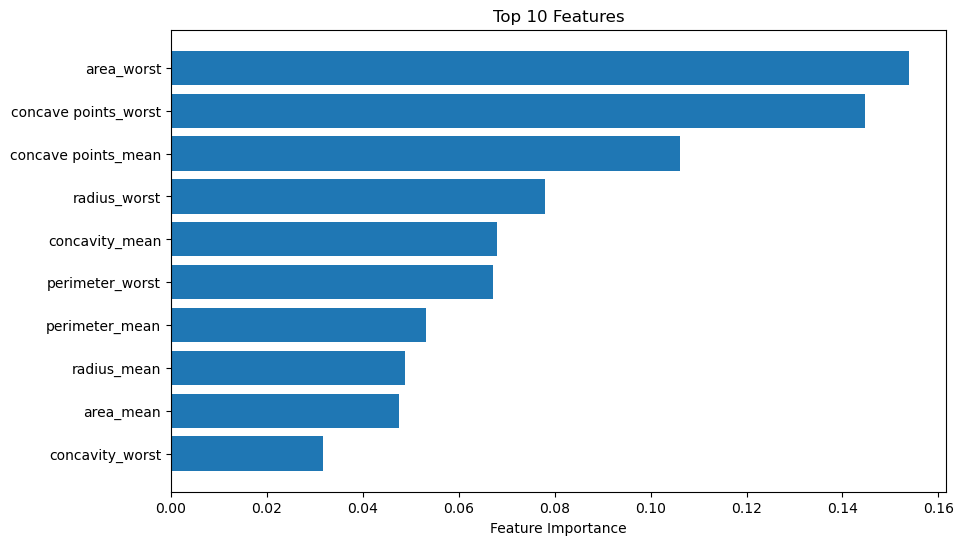

In [116]:
import numpy as np
# Optional: Print feature importance
import matplotlib.pyplot as plt

# Get top features
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Features')
plt.show()
